## Họ và tên sinh viên thực hiện

1. Đinh Thị Ngọc Phượng - 52100923

2. Đinh Phú Quốc        - 52100927

3. Cao Đăng Tình        - 52100936

In [105]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif, SelectKBest
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1 . Analyze data

### Read data file

In [96]:
data = pd.read_csv('./wine.csv')

### Type of attribute

Bộ dữ liệu gồm các dữ liệu dạng số và dạng chữ.

Với dữ liệu dạng chữ là 'color'

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Preprocessing

#### Drop duplicate record

In [100]:
data.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,red
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


#### Check missing value

In [101]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

#### Data Transformation

In [102]:
le =LabelEncoder()

le.fit(data['color'])

data['color']=le.transform(data['color'])


In [110]:
X = data.drop('color', axis=1)
y = data['color']

### Data Analysis and Visualization

#### Distribute of color

Text(0.5, 1.0, 'Distribution of target class')

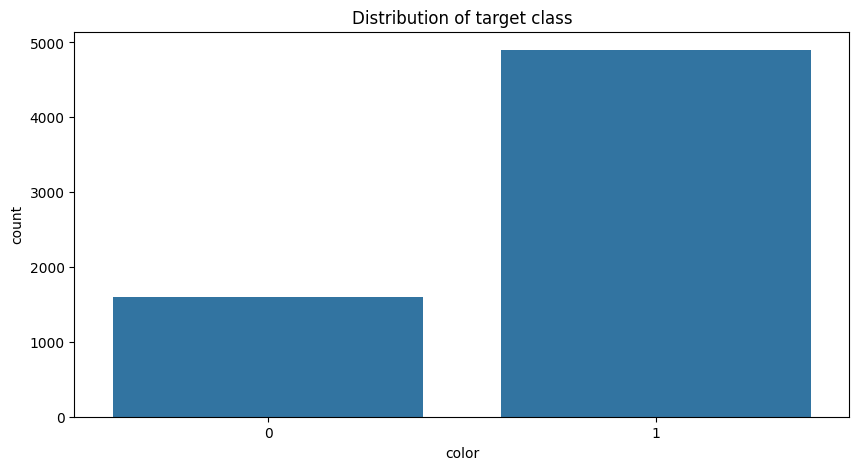

In [107]:
plt.figure(figsize=(10, 5))
sns.countplot(x='color', data=data)
plt.title("Distribution of target class")

#### Distribute of feature

In [130]:
def visualize(feature):
    title = "Distribution of " + str(feature)
    plt.figure(figsize=(20, 10))
    fig = px.histogram(data_frame=data, x=feature, title=title)
    fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
    fig.show()


In [131]:
feature_list = X.columns

feature_list = [str(feature) for feature in feature_list]

for feature in feature_list:
    visualize(feature=feature)

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

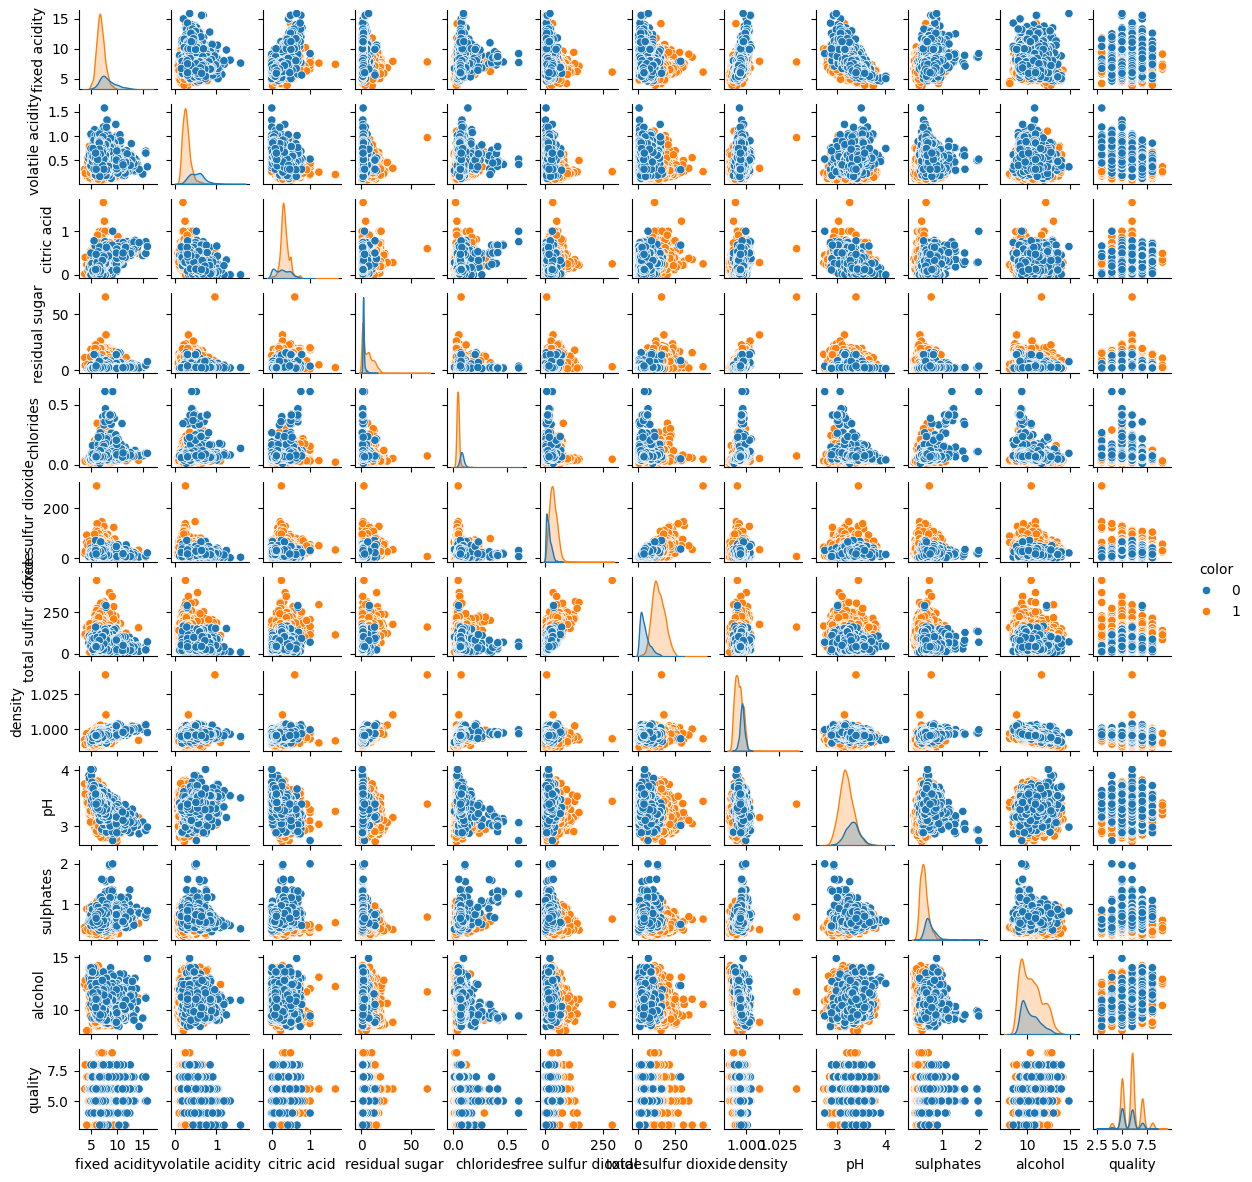

In [123]:
sns.pairplot(data, hue = 'color', height = 1)

### Importance of every attribute

Ta thấy , với bài toán phân loại màu sắc rượu, các attribute quan trọng nhất là total sunful dioxide, volatile acidity

Trong khi đó , các tham số citric acid , quality, alcohol không ảnh hưởng nhiều tới kết quả dự đoán

<Axes: >

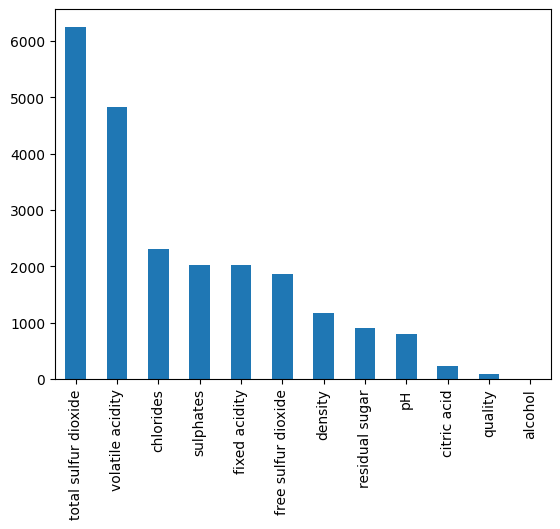

In [124]:
score = f_classif(X, y)

value = pd.Series(score[0], index=X.columns)
value.sort_values(ascending=False, inplace=True)
value.plot.bar()

## 2. Solve problem

### Get the train and test dataset

In [125]:
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### KNN

Khởi tạo mô hình KNN với số láng giềng (k) là 3

In [126]:

knn_model = KNeighborsClassifier(n_neighbors=3)


knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.9372307692307692


### Random Forest

Mô hình Random Forest là một dạng Ensemble Learning, với thành phần là nhiều mô hình Decision Tree

In [127]:

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.9950769230769231


### AdaBoost

Mô hình Ada Boost là một dạng mô hình thuộc Ensemble Learning

In [12]:
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

adaboost_model.fit(X_train, y_train)

y_pred = adaboost_model.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.9932307692307693


### Gaussian Naive Bayes

In [58]:
model_gnb = GaussianNB()

model_gnb.fit(X_train, y_train)

y_pred = model_gnb.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))


accuracy :  0.9686153846153847


### Decision Tree

In [15]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.984


## 3 . Neutral Network

### Khởi tạo các tham số cần thiết cho mô hình

In [27]:
X_value = data.drop('color', axis=1).values
y_value = data['color'].values

In [28]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_value, y_value, test_size=0.2, random_state=42)

In [29]:
X_train_n = X_train_n.reshape((X_train_n.shape[0], 1, X_train_n.shape[1]))
X_test_n = X_test_n.reshape((X_test_n.shape[0], 1, X_test_n.shape[1]))

### Feed Forward Neutral Network

In [30]:
model_fnn = Sequential()
model_fnn.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model_fnn.add(Dense(16, activation='relu'))
model_fnn.add(Dense(1, activation='sigmoid'))

In [31]:
model_fnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history = model_fnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

Epoch 1/100


77/77 [==============================] - 1s 3ms/step - loss: 1.6124 - accuracy: 0.7939 - val_loss: 0.3125 - val_accuracy: 0.9169
Epoch 2/100
77/77 [==============================] - 0s 1ms/step - loss: 0.2448 - accuracy: 0.9347 - val_loss: 0.2384 - val_accuracy: 0.9231
Epoch 3/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1984 - accuracy: 0.9394 - val_loss: 0.2136 - val_accuracy: 0.9268
Epoch 4/100
77/77 [==============================] - 0s 1ms/step - loss: 0.1870 - accuracy: 0.9399 - val_loss: 0.2069 - val_accuracy: 0.9280
Epoch 5/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1799 - accuracy: 0.9394 - val_loss: 0.1972 - val_accuracy: 0.9292
Epoch 6/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1736 - accuracy: 0.9405 - val_loss: 0.1918 - val_accuracy: 0.9317
Epoch 7/100
77/77 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9429 - val_loss: 0.1918 - val_accuracy: 0.9305
Epoch 8/100
77/77 [======

In [33]:
loss, accuracy = model_fnn.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

51/51 [==============================] - 0s 1ms/step - loss: 0.0782 - accuracy: 0.9760
Test Loss: 0.0782
Test Accuracy: 0.9760


In [34]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))


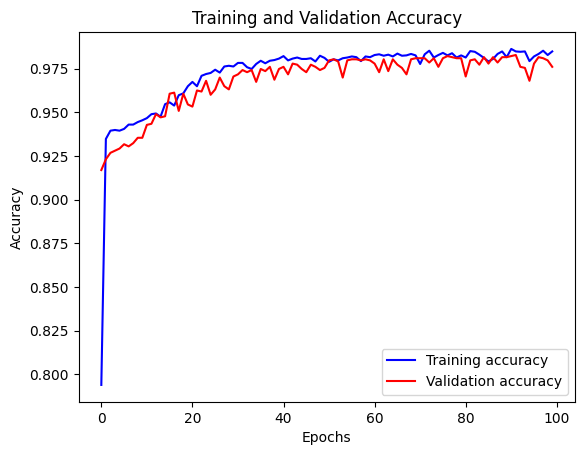

In [35]:
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Recurrent Neutral Network

Để thực hiện mô hình RNN , ta sẽ sử dụng các Long - Short Term Memory

Mô hình này gồm 4 lớp , trong đó có 3 lớp ẩn 

Lớp cuối cùng gồm 2 node tượng trưng cho 2 lớp , hàm activation của lớp này là softmax



In [40]:
model_rnn = Sequential()
model_rnn.add(LSTM(128, input_shape=(X_train_n.shape[1], X_train_n.shape[2]), return_sequences=True))
model_rnn.add(LSTM(128, return_sequences=True))
model_rnn.add(LSTM(64))
model_rnn.add(Dense(2, activation='softmax'))

In [41]:
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
history = model_rnn.fit(X_train_n, y_train_n, epochs=50, batch_size=64, validation_data=(X_test_n, y_test_n))

Epoch 1/50
82/82 [==============================] - 1s 7ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0521 - val_accuracy: 0.9869
Epoch 2/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0334 - accuracy: 0.9904 - val_loss: 0.0380 - val_accuracy: 0.9908
Epoch 3/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0277 - accuracy: 0.9927 - val_loss: 0.0370 - val_accuracy: 0.9908
Epoch 4/50
82/82 [==============================] - 1s 6ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0536 - val_accuracy: 0.9838
Epoch 5/50
82/82 [==============================] - 1s 6ms/step - loss: 0.0289 - accuracy: 0.9911 - val_loss: 0.0495 - val_accuracy: 0.9854
Epoch 6/50
82/82 [==============================] - 0s 6ms/step - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.1061 - val_accuracy: 0.9738
Epoch 7/50
82/82 [==============================] - 1s 7ms/step - loss: 0.0338 - accuracy: 0.9904 - val_loss: 0.0550 - val_accuracy: 0.9823
Epoch 8/50
82/82 [==

In [50]:
loss, accuracy = model_rnn.evaluate(X_test_n, y_test_n)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

41/41 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9869
Test Loss: 0.0469
Test Accuracy: 0.9869


In [51]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))


#### Biểu diễn độ chính xác của model trên tập train và tập test

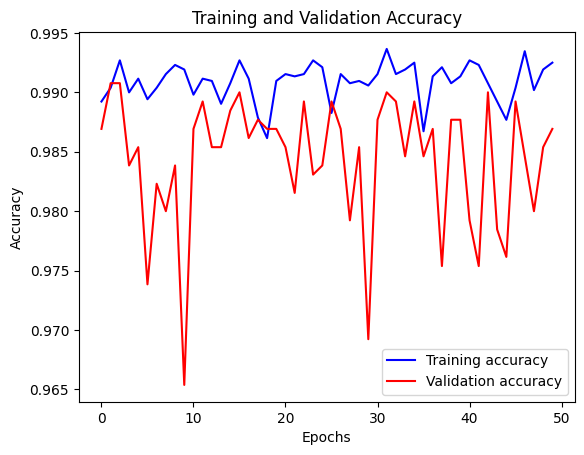

In [52]:
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Biểu diễn độ mất mát của model trên tập train và tập test

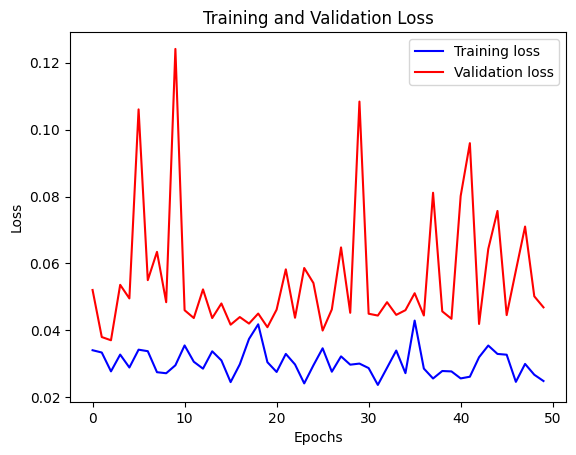

In [53]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 4. Overfitting

### KNN

Cách để giảm overfitting trong mô hình KNN bằng cách sử dụng kỹ thuật cross-validation để tìm giá trị tối ưu cho tham số k

In [54]:
# Sử dụng cross-validation để tìm giá trị k tối ưu
k_values = np.arange(1, 21)
accuracy_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(np.mean(scores))

# Chọn giá trị k tối ưu
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f'Tối ưu giá trị k: {optimal_k}')

# Huấn luyện mô hình KNN với giá trị k tối ưu trên toàn bộ tập huấn luyện
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)

# Huấn luyện mô hình trên toàn bộ dữ liệu
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))


Tối ưu giá trị k: 1
accuracy :  0.9495384615384616


### Random Forest

In [55]:
# Huấn luyện mô hình Random Forest ban đầu
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Đánh giá độ chính xác của mô hình ban đầu trên tập kiểm tra
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác ban đầu:", accuracy)

# Giảm overfitting bằng cách giới hạn độ sâu của cây
rf_reduced_depth = RandomForestClassifier(max_depth=10)
rf_reduced_depth.fit(X_train, y_train)

# Đánh giá độ chính xác sau khi giảm overfitting
y_pred_reduced_depth = rf_reduced_depth.predict(X_test)
accuracy_reduced_depth = accuracy_score(y_test, y_pred_reduced_depth)
print("Độ chính xác sau khi giảm overfitting:", accuracy_reduced_depth)

Độ chính xác ban đầu: 0.9969230769230769
Độ chính xác sau khi giảm overfitting: 0.9969230769230769


### AdaBoost

Sử dụng cây quyết định đơn giản trong mô hình AdaBoost để giảm độ phức tạp của các mô hình cơ bản (base models), từ đó giảm khả năng overfitting. 

Giúp mô hình tổng hợp tập trung vào các quy luật quyết định quan trọng mà không phải là các chi tiết không quan trọng có thể dẫn đến overfitting.

In [56]:
# Khởi tạo mô hình AdaBoost với các cây quyết định có độ sâu thấp
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),  # Độ sâu thấp
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

adaboost_model.fit(X_train, y_train)

y_pred = adaboost_model.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.9938461538461538


### Gaussian Naive Bayes

Sử dụng adaboost với estimator là model GaussianNB để giảm overfitting

In [59]:
gnb = GaussianNB()


gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print("accuracy ban đầu: ", accuracy_score(y_test, y_pred))



adaboost = AdaBoostClassifier(estimator=gnb, n_estimators=50, random_state=42)

adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("accuracy sau khi giảm overfitting:", accuracy)

accuracy ban đầu:  0.9686153846153847
accuracy sau khi giảm overfitting: 0.9483076923076923


### Decision Tree

Thiết lập độ sâu tối đa cho cây để có thể giảm overfitting

In [60]:
dt_over = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=5)

dt_over.fit(X_train, y_train)

y_pred = dt_over.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.9778461538461538


### Recurrent Neutral Network

Để giảm overfitting , ta có thể giảm độ phức tạp của mô hình bằng cách giảm hidden layer , cũng như số neuron trên 1 layer, giảm epochs

Để hạn chế overfitting , ở đây ta sẽ giảm đi một hidden layer so với mô hình đã huấn luyện ở câu 3, từ đó sẽ giảm độ phức tạp của mô hình , sẽ giúp giảm overfitting.

Thêm vào đó , tại bước fit , ta sẽ giảm epochs từ 50 xuống 25 , giảm batch size từ 64 xuống 32

In [62]:
model_fnn_over = Sequential()
model_fnn_over.add(LSTM(128, input_shape=(X_train_n.shape[1], X_train_n.shape[2]), return_sequences=True))
model_fnn_over.add(LSTM(64))
model_fnn_over.add(Dense(2, activation='softmax'))

In [63]:
model_fnn_over.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
history =  model_fnn_over.fit(X_train_n, y_train_n, epochs=25, batch_size=32, validation_data=(X_test_n, y_test_n))

Epoch 1/25
  1/163 [..............................] - ETA: 1s - loss: 0.0019 - accuracy: 1.0000

163/163 [==============================] - 1s 5ms/step - loss: 0.0511 - accuracy: 0.9831 - val_loss: 0.0535 - val_accuracy: 0.9831
Epoch 2/25
163/163 [==============================] - 1s 4ms/step - loss: 0.0425 - accuracy: 0.9875 - val_loss: 0.0560 - val_accuracy: 0.9862
Epoch 3/25
163/163 [==============================] - 1s 4ms/step - loss: 0.0494 - accuracy: 0.9836 - val_loss: 0.0561 - val_accuracy: 0.9869
Epoch 4/25
163/163 [==============================] - 1s 4ms/step - loss: 0.0511 - accuracy: 0.9835 - val_loss: 0.0626 - val_accuracy: 0.9785
Epoch 5/25
163/163 [==============================] - 1s 4ms/step - loss: 0.0454 - accuracy: 0.9858 - val_loss: 0.0714 - val_accuracy: 0.9762
Epoch 6/25
163/163 [==============================] - 1s 5ms/step - loss: 0.0430 - accuracy: 0.9869 - val_loss: 0.0601 - val_accuracy: 0.9838
Epoch 7/25
163/163 [==============================] - 1s 4ms/step - loss: 0.0505 - accuracy: 0.9831 - val_loss: 0.0634 - val_accuracy: 0.9769
Epoch 8/25
163/16

Ta thấy độ chính xác đã giảm , từ 0.9869 ở câu 3 , còn 0.9815

In [66]:
loss, accuracy = model_fnn_over.evaluate(X_test_n, y_test_n)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

41/41 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9815
Test Loss: 0.0568
Test Accuracy: 0.9815


## 5. Improve the accuracy

### KNN

Lựa chọn các features quan trọng và có sự ảnh hưởng đến mô hình để cải thiện việc huấn luyện KNN

<Axes: >

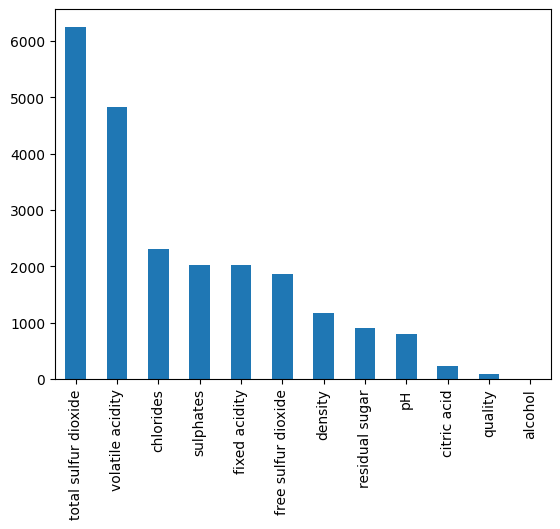

In [71]:
X = data.drop('color', axis=1)
y = data['color']

score = f_classif(X, y)

value = pd.Series(score[0], index=X.columns)
value.sort_values(ascending=False, inplace=True)
value.plot.bar()

#### Select 9 best attribute

In [72]:
selector = SelectKBest(f_classif, k = 9)
selector.fit(X,y)
cols_name = selector.get_support(indices=True)

X_train_new = X_train.iloc[:,cols_name]
X_test_new = X_test.iloc[:,cols_name]

#### Evaluate

Kết quả thu được là : 0.9452307692307692.

Thu được kết quả tốt hơn so với mô hình ban đầu : 0.9372307692307692

In [74]:
knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(X_train_new, y_train)

y_pred = knn_model.predict(X_test_new)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.9452307692307692


### Ramdom Forest

Cải thiện mô hình Random Forest bằng cách chọn các giá trị tối ưu cho n_estimators, max_depth, và min_samples_split

Ta sẽ dùng GridSearchCV để thử nghiệm tất cả các kết hợp có thể của các giá trị này và trả về bộ tham số tối ưu.

Sau đó, sử dụng bộ tham số tối ưu để huấn luyện mô hình và đánh giá hiệu suất trên tập kiểm tra.

In [75]:
# Định nghĩa mô hình Random Forest
rf_model = RandomForestClassifier()

# Đặt ra các giá trị tham số muốn thử nghiệm
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Sử dụng Grid Search để tìm ra các tham số tối ưu
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra các tham số tối ưu
best_params = grid_search.best_params_
print("Các thông số tối ưu:", best_params)

# Huấn luyện mô hình với các tham số tối ưu trên toàn bộ tập huấn luyện
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Đánh giá độ chính xác trên tập kiểm thử
y_pred_test = best_rf_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Set:", accuracy_test)


Các thông số tối ưu: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on Test Set: 0.9969230769230769


### AdaBoost

Tương tự với Random Forest, dùng GridSearchCV để thử nghiệm tất cả các kết hợp có thể của các giá trị này và trả về bộ tham số tối ưu
Sau đó, sử dụng bộ tham số tối ưu để huấn luyện mô hình và đánh giá hiệu suất trên tập kiểm tra.

In [76]:
# Định nghĩa mô hình AdaBoost
ab_model = AdaBoostClassifier()

# Thiết lập các giá trị tham số cần thử nghiệm
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]
}

# Sử dụng Grid Search để tối ưu hóa tham số
grid_search = GridSearchCV(estimator=ab_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra các tham số tối ưu
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Huấn luyện mô hình với các tham số tối ưu trên toàn bộ tập huấn luyện
best_ab_model = grid_search.best_estimator_
best_ab_model.fit(X_train, y_train)

# Đánh giá độ chính xác trên tập kiểm thử
y_pred_test = best_ab_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Set:", accuracy_test)


Best Parameters: {'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 1.0, 'n_estimators': 200}
Accuracy on Test Set: 0.9963076923076923


### Gaussian NB

Tương tự KNN ta cũng sẽ lựa chọn các features quan trọng và có sự ảnh hưởng đến mô hình để cải thiện việc huấn luyện 

In [78]:
model_gnn_improve = GaussianNB()

model_gnn_improve.fit(X_train_new, y_train)

y_pred = model_gnn_improve.predict(X_test_new)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.9673846153846154


### Feed Forward Neutral Network

Để tăng accuracy , ta có thể tăng 

        Thêm 1 hidden layer, ở đây ta tăng thêm 1 hidden layer với 16 node , activation = relu

        epochs : từ 100 lên 150

        batch_size : từ 64 lên 256

In [87]:
model_fnn_imp = Sequential()
model_fnn_imp.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model_fnn_imp.add(Dense(16, activation='relu'))
model_fnn_imp.add(Dense(16, activation='relu'))
model_fnn_imp.add(Dense(1, activation='sigmoid'))


In [88]:
model_fnn_imp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
history = model_fnn_imp.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=256)

Epoch 1/150
20/20 [==============================] - 1s 11ms/step - loss: 0.6604 - accuracy: 0.7385 - val_loss: 0.4448 - val_accuracy: 0.7698
Epoch 2/150
20/20 [==============================] - 0s 3ms/step - loss: 0.3731 - accuracy: 0.8060 - val_loss: 0.3059 - val_accuracy: 0.8738
Epoch 3/150
20/20 [==============================] - 0s 3ms/step - loss: 0.2716 - accuracy: 0.9011 - val_loss: 0.2575 - val_accuracy: 0.9114
Epoch 4/150
20/20 [==============================] - 0s 3ms/step - loss: 0.2376 - accuracy: 0.9126 - val_loss: 0.2448 - val_accuracy: 0.9083
Epoch 5/150
20/20 [==============================] - 0s 3ms/step - loss: 0.2255 - accuracy: 0.9200 - val_loss: 0.2369 - val_accuracy: 0.9157
Epoch 6/150
20/20 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9282 - val_loss: 0.2186 - val_accuracy: 0.9237
Epoch 7/150
20/20 [==============================] - 0s 6ms/step - loss: 0.1966 - accuracy: 0.9327 - val_loss: 0.2154 - val_accuracy: 0.9206
Epoch 8/150


In [92]:
loss, accuracy = model_fnn_imp.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

51/51 [==============================] - 0s 1ms/step - loss: 0.0802 - accuracy: 0.9754
Test Loss: 0.0802
Test Accuracy: 0.9754


In [93]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

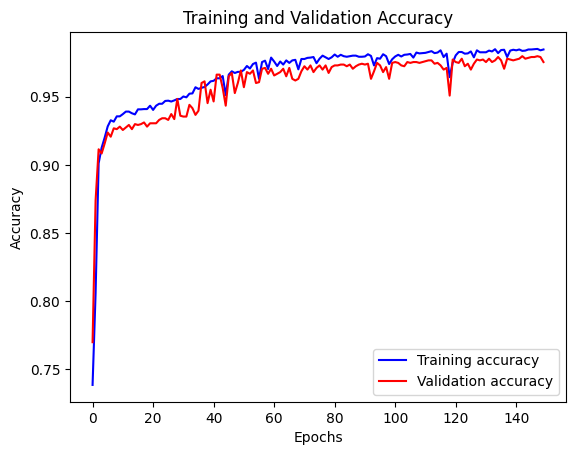

In [94]:
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Recurrent Neutral Network

Tăng accuracy bằng cách tăng epochs cũng như batch_size

Ở bước fit, ta tăng epochs từ 50 lên 100, batch_size từ 64 lên 512

In [79]:
model_rnn_imp = Sequential()
model_rnn_imp.add(LSTM(128, input_shape=(X_train_n.shape[1], X_train_n.shape[2]), return_sequences=True))
model_rnn_imp.add(LSTM(128, return_sequences=True))
model_rnn_imp.add(LSTM(64))
model_rnn_imp.add(Dense(2, activation='softmax'))

In [80]:
model_rnn_imp.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [81]:
model_rnn_imp.fit(X_train_n, y_train_n, epochs=100, batch_size=512, validation_data=(X_test_n, y_test_n))

Epoch 1/100


11/11 [==============================] - 5s 106ms/step - loss: 0.6222 - accuracy: 0.7556 - val_loss: 0.4975 - val_accuracy: 0.7931
Epoch 2/100
11/11 [==============================] - 0s 19ms/step - loss: 0.3995 - accuracy: 0.8299 - val_loss: 0.3016 - val_accuracy: 0.8962
Epoch 3/100
11/11 [==============================] - 0s 23ms/step - loss: 0.2527 - accuracy: 0.9286 - val_loss: 0.2470 - val_accuracy: 0.9169
Epoch 4/100
11/11 [==============================] - 0s 20ms/step - loss: 0.2110 - accuracy: 0.9309 - val_loss: 0.2239 - val_accuracy: 0.9208
Epoch 5/100
11/11 [==============================] - 0s 20ms/step - loss: 0.1894 - accuracy: 0.9380 - val_loss: 0.2089 - val_accuracy: 0.9269
Epoch 6/100
11/11 [==============================] - 0s 22ms/step - loss: 0.1747 - accuracy: 0.9415 - val_loss: 0.1958 - val_accuracy: 0.9285
Epoch 7/100
11/11 [==============================] - 0s 31ms/step - loss: 0.1579 - accuracy: 0.9461 - val_loss: 0.1774 - val_accuracy: 0.9400
Epoch 8/100
11/11

In [83]:
loss, accuracy = model_rnn_imp.evaluate(X_test_n, y_test_n)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

41/41 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9877
Test Loss: 0.0487
Test Accuracy: 0.9877
